In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from scipy import stats
import random
from scipy.stats import uniform, randint
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Set the seed for reproducibility

np.random.seed(42)
random.seed(42)

# Load the data
data = pd.read_csv('dataset.csv', index_col=0)
df = pd.DataFrame(data)

In [3]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [5]:
df.shape

(114000, 20)

In [6]:
df[df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [7]:
df = df.dropna(axis=0)

In [8]:
df['track_genre'].nunique()

114

In [9]:
df["explicit"]=df["explicit"].astype(int) # convert explicit column to integer

In [10]:
df[df.duplicated()] # check for duplicates

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,0,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,0,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,0,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,0,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,0,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,0,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,0,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,0,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,0,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


In [11]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.085501,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.279627,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


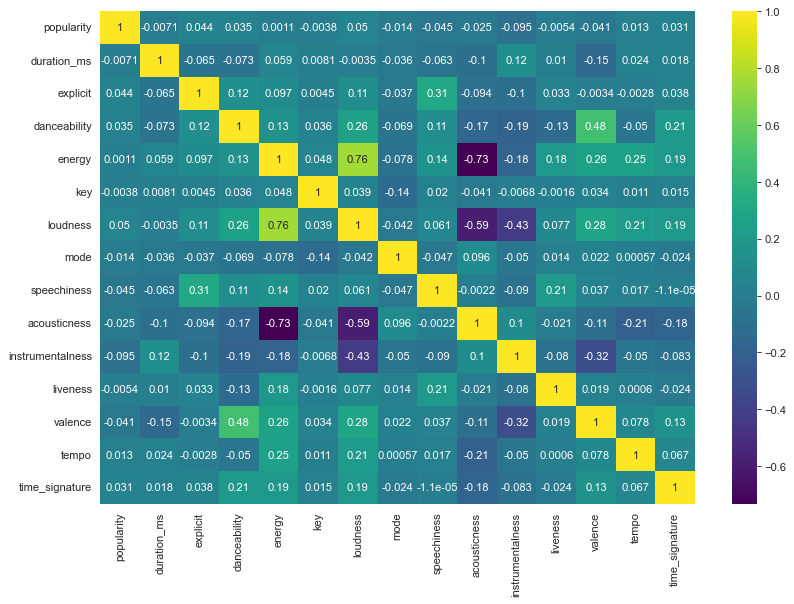

In [12]:
# Check for correlation
corr_mat = df.select_dtypes(include=["int", "float"]).corr()
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='b')
sns.heatmap(corr_mat, annot=True, cmap="viridis")
plt.show()

In [13]:
num_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
num_cols.shape

(113999, 15)

In [14]:
num_cols.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  int64  
 1   duration_ms       113999 non-null  int64  
 2   explicit          113999 non-null  int64  
 3   danceability      113999 non-null  float64
 4   energy            113999 non-null  float64
 5   key               113999 non-null  int64  
 6   loudness          113999 non-null  float64
 7   mode              113999 non-null  int64  
 8   speechiness       113999 non-null  float64
 9   acousticness      113999 non-null  float64
 10  instrumentalness  113999 non-null  float64
 11  liveness          113999 non-null  float64
 12  valence           113999 non-null  float64
 13  tempo             113999 non-null  float64
 14  time_signature    113999 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 13.9 MB


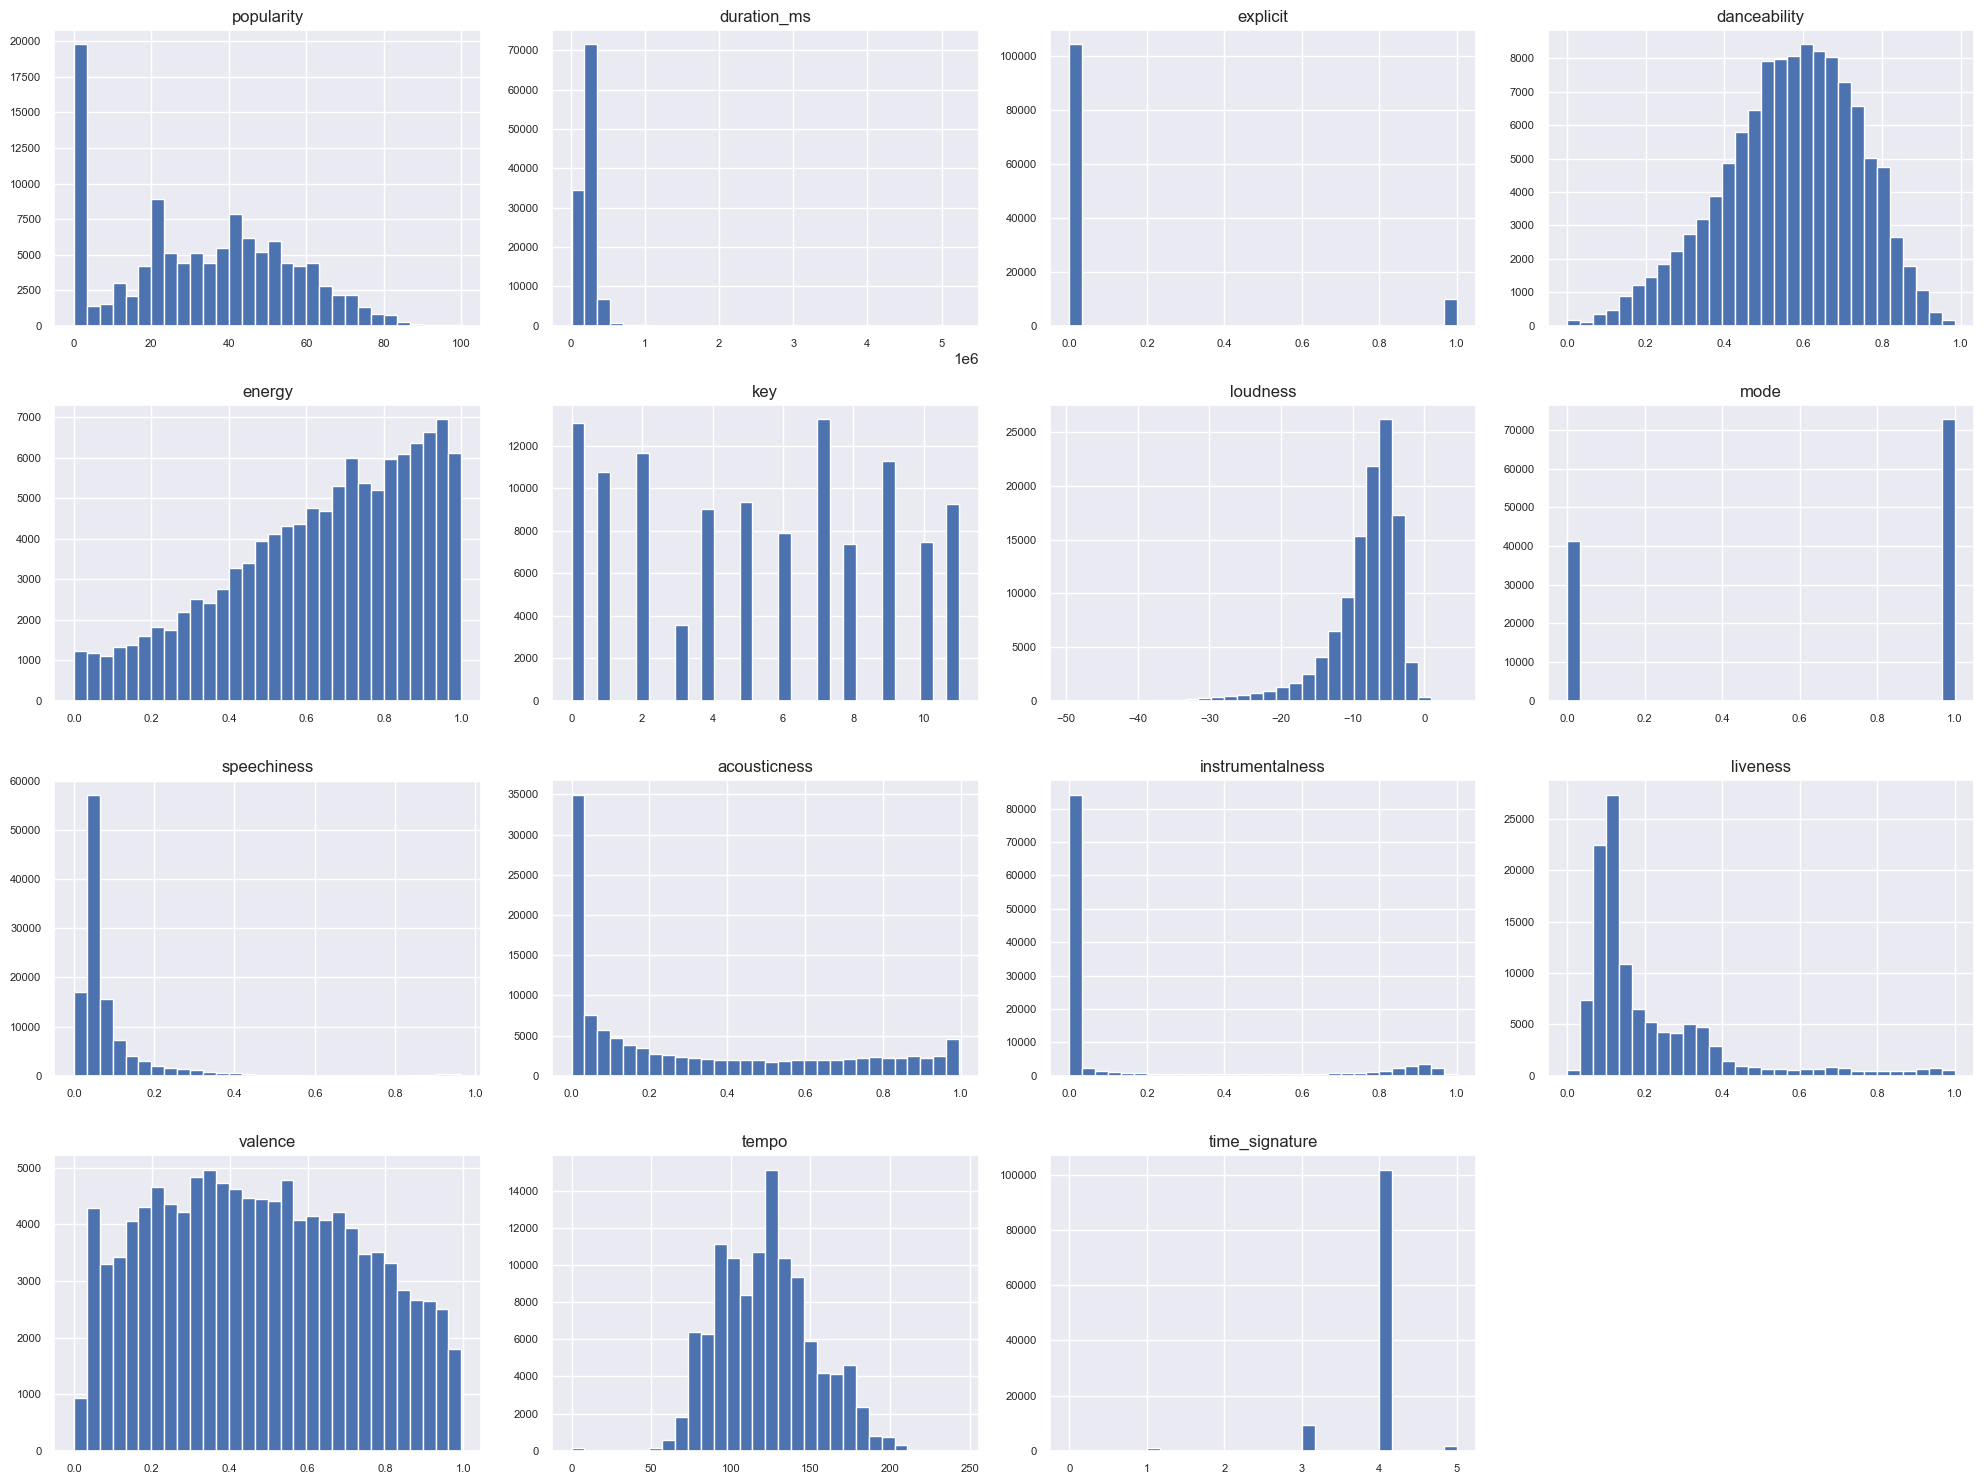

In [15]:
# Histograms of numerical columns
sns.set_style('whitegrid')
sns.set()
num_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

In [16]:
# Motivation for feature engineering
# The dataset is imbalanced
features = df[['danceability','energy', 'loudness', 'valence', 'tempo']] # features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [17]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [18]:
# Genre to category mapping for playlist creation
genre_to_music_category = {
    # EDM
    'edm': 'Electronic Dance Music', 
    'house': 'Electronic Dance Music', 
    'electro': 'Electronic Dance Music', 
    'trance': 'Electronic Dance Music', 
    'techno': 'Electronic Dance Music', 
    'dubstep': 'Electronic Dance Music', 
    'drum-and-bass': 'Electronic Dance Music', 
    'deep-house': 'Electronic Dance Music', 
    'detroit-techno': 'Electronic Dance Music', 
    'minimal-techno': 'Electronic Dance Music', 
    'progressive-house': 'Electronic Dance Music', 
    'breakbeat': 'Electronic Dance Music',
    
    # Rock
    'alt-rock': 'Rock', 
    'rock': 'Rock', 
    'indie': 'Rock', 
    'indie-pop': 'Rock', 
    'punk': 'Rock', 
    'punk-rock': 'Rock', 
    'hard-rock': 'Rock', 
    'metal': 'Rock', 
    'heavy-metal': 'Rock', 
    'black-metal': 'Rock', 
    'death-metal': 'Rock', 
    'grunge': 'Rock',
    
    # Hip-Hop and R&B
    'hip-hop': 'Hip-Hop and R&B', 
    'r-n-b': 'Hip-Hop and R&B', 
    'trap': 'Hip-Hop and R&B',
    
    # Pop
    'pop': 'Pop', 
    'electro-pop': 'Pop', 
    'synth-pop': 'Pop', 
    'k-pop': 'Pop', 
    'pop-film': 'Pop', 
    'power-pop': 'Pop',
    
    # Latin & Reggae/Dancehall
    'latin': 'Latin & Reggae/Dancehall', 
    'reggaeton': 'Latin & Reggae/Dancehall', 
    'salsa': 'Latin & Reggae/Dancehall', 
    'samba': 'Latin & Reggae/Dancehall', 
    'reggae': 'Latin & Reggae/Dancehall', 
    'dancehall': 'Latin & Reggae/Dancehall',
    
    # Funk and Disco
    'funk': 'Funk and Disco', 
    'disco': 'Funk and Disco', 
    'groove': 'Funk and Disco',
}

# Map each track to a category
df['music_category'] = df['track_genre'].apply(lambda x: genre_to_music_category.get(x, 'Other'))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  int64  
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [20]:
df.sample(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,music_category
113186,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,50,440247,0,0.369,0.598,7,...,1,0.0304,0.005110,0.00000,0.1760,0.0466,148.014,4,world-music,Other
42819,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,11,93933,0,0.171,0.997,7,...,1,0.1180,0.005210,0.80100,0.4200,0.0294,122.223,4,grindcore,Other
59311,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",0,213578,0,0.173,0.803,9,...,0,0.1440,0.613000,0.00191,0.1950,0.0887,75.564,3,iranian,Other
90417,1FuZ8H0Ts3799ZNVN5ZcSZ,Billy Fury,A Thousand Stars,It's Only Make Believe,34,146706,0,0.419,0.382,9,...,1,0.0322,0.320000,0.00000,0.1060,0.4620,84.185,4,rock-n-roll,Other
61000,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,57,236293,0,0.555,0.941,9,...,0,0.0481,0.484000,0.00000,0.2660,0.8130,92.487,4,j-idol,Other
96815,2zQt5C0AIv27RhfJCRZdZ4,BaianaSystem,Duas Cidades,"Jah Jah Revolta, Pt. 2",38,309493,0,0.776,0.800,8,...,0,0.0438,0.006310,0.07310,0.3500,0.5830,143.989,4,samba,Latin & Reggae/Dancehall
18939,6BctgCJXlgxYeR0ObhLdtR,Joe DeRosa,You Let Me Down,Please Stop Communicating,21,496201,0,0.627,0.815,6,...,0,0.9110,0.785000,0.00000,0.7440,0.5320,119.197,5,comedy,Other
72760,1LDQFdGTEXOnycDC8CJ5p1,Cane Hill,A Form of Protest,A Form of Protest,54,189405,0,0.395,0.933,11,...,0,0.1160,0.000009,0.01250,0.3280,0.1940,92.530,4,metalcore,Other
25788,2DDR5F7bHFJBiX6lPPsT8O,Kano,I'm Ready (Disco Mix - Original 12 Inch Version),I'm Ready - Radio Edit,29,209226,0,0.914,0.766,5,...,1,0.0387,0.192000,0.65000,0.0747,0.9000,126.632,4,disco,Funk and Disco
87169,2ScU6iEvgb0TIuKiyem9rg,Charlie Brown Jr.,Acústico (Ao Vivo),Proibida Pra Mim (Grazon) - Ao Vivo,48,151666,0,0.345,0.976,8,...,1,0.0487,0.000587,0.05070,0.4870,0.8180,181.121,4,r-n-b,Hip-Hop and R&B


In [21]:
df['music_category'].value_counts() # check the distribution of the music categories

music_category
Other                       74000
Rock                        12000
Electronic Dance Music      12000
Latin & Reggae/Dancehall     6000
Pop                          4999
Funk and Disco               3000
Hip-Hop and R&B              2000
Name: count, dtype: int64

In [22]:
df['music_category'].unique()

array(['Other', 'Rock', 'Electronic Dance Music',
       'Latin & Reggae/Dancehall', 'Funk and Disco', 'Hip-Hop and R&B',
       'Pop'], dtype=object)

In [23]:
#Clustering songs in different playlists
kmeans = KMeans(n_clusters=7, random_state=42) 
df['cluster'] = kmeans.fit_predict(scaled_features)

In [24]:
#PCA for visualisation
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)


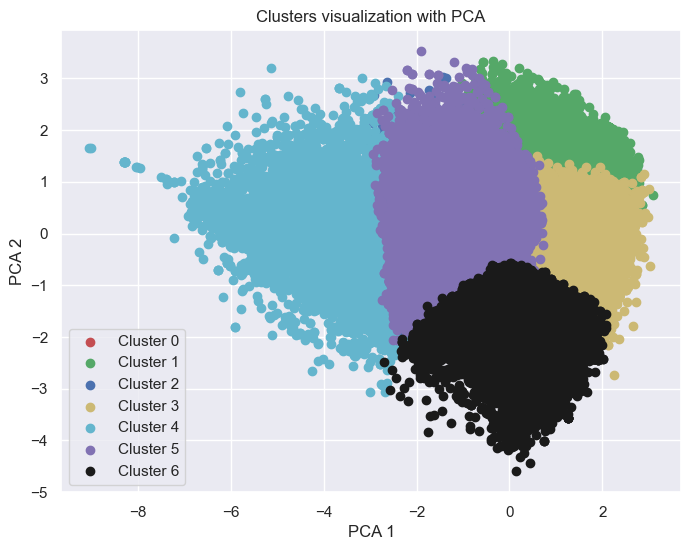

In [25]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']  # Colors for the clusters

# Plot each cluster
for i in range(7):
    
    idx = df['cluster'] == i
    plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], c=colors[i], label=f'Cluster {i}')

# Adjust visuals
plt.title('Clusters visualization with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Assigning music categories to the clusters
mood_labels = ['Other', 'Rock', 'Electronic Dance Music',
       'Latin & Reggae/Dancehall', 'Funk and Disco', 'Hip-Hop and R&B',
       'Pop']  
df['music_category'] = df['cluster'].apply(lambda x: mood_labels[x])

In [27]:
df['music_category'].value_counts() # check clusters distribution

music_category
Rock                        27217
Other                       21353
Hip-Hop and R&B             16216
Latin & Reggae/Dancehall    16185
Pop                         13954
Electronic Dance Music      12586
Funk and Disco               6488
Name: count, dtype: int64

In [28]:
df['cluster'].value_counts()

cluster
1    27217
0    21353
5    16216
3    16185
6    13954
2    12586
4     6488
Name: count, dtype: int64

In [29]:
df.sample(4)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,music_category,cluster
58592,4YwqMRlD5MSn4gj34c5q1j,Static-X,Cannibal,Chemical Logic,23,231693,0,0.503,0.999,10,...,0.2400,0.003380,0.000107,0.0696,0.300,183.998,4,industrial,Pop,6
42756,4jYGAsfqGi9CHOvyslLP3P,Lock Up,The Dregs of Hades,Black Illumination,12,232687,1,0.203,0.955,1,...,0.1490,0.000004,0.037300,0.0612,0.267,170.000,4,grindcore,Pop,6
41387,1wVUMLb3gQ2GJWHlxecq4Y,Epica,Live At Paradiso,Cry For The Moon - Live At Paradiso,24,478500,0,0.465,0.810,2,...,0.0454,0.009130,0.000138,0.9740,0.216,89.936,4,goth,Other,0
2003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,0,0.612,0.807,10,...,0.0336,0.049500,0.017700,0.1010,0.398,124.053,4,alt-rock,Other,0


In [30]:
df.to_csv('dataset_with_categories.csv', index=False) # save the dataset

In [31]:
# Select features and target variable
X = num_cols
y = df['music_category']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [33]:
# Instantiate the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}\n")
    

Random Forest Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.97      0.95      0.96      2499
          Funk and Disco       0.98      0.97      0.97      1282
         Hip-Hop and R&B       0.95      0.96      0.96      3235
Latin & Reggae/Dancehall       0.98      0.97      0.97      3241
                   Other       0.96      0.98      0.97      4173
                     Pop       0.98      0.97      0.97      2889
                    Rock       0.98      0.98      0.98      5481

                accuracy                           0.97     22800
               macro avg       0.97      0.97      0.97     22800
            weighted avg       0.97      0.97      0.97     22800

SVM Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.97      0.97      0.97      2499
          Funk and Disco       0.99      0.98      0.98      1282
        

In [34]:
# Cross-validation

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Apply cross-validation and print the results
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Decision Tree Accuracy: 0.94 (+/- 0.01)
Random Forest Accuracy: 0.96 (+/- 0.01)
SVM Accuracy: 0.97 (+/- 0.02)


In [35]:
# Hyperparameter tuning
# Random Forest
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20, 50, 70, 100, 200, 500, 1000],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

# Instantiate the RandomizedSearchCV object
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1,error_score='raise')

# Fit the RandomizedSearchCV object
rf_random.fit(X_train, y_train)

# Print the best parameters
print(rf_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=30, n_estimators=50; total time=   5.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=30, n_estimators=50; total time=   5.4s
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=8, min_samples_split=30, n_estimators=100; total time=  17.6s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=8, min_samples_split=2, n_estimators=200; total time=  20.0s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=30, n_estimators=200; total time=  31.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.4min


/Users/dogukan/PycharmProjects/hw_project/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=  16.6s
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=  13.3s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=30, n_estimators=20; total time=   3.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=30, n_estimators=20; total time=   2.9s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=30, n_estimators=20; total time=   3.2s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=1, min_samples_split=30, n_estimators=10; total time=   1.1s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=1, min_samples_split=30, n_estimators=10; total time=   1.1s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=1, m

In [36]:
# Random Forest model tuning with RandomizedSearchCV
best_params_rf = rf_random.best_params_
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_best.predict(X_test)
print(f"Optimized Random Forest Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}")

Optimized Random Forest Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.97      0.96      0.96      2499
          Funk and Disco       0.98      0.98      0.98      1282
         Hip-Hop and R&B       0.96      0.96      0.96      3235
Latin & Reggae/Dancehall       0.98      0.97      0.98      3241
                   Other       0.97      0.98      0.98      4173
                     Pop       0.98      0.97      0.97      2889
                    Rock       0.98      0.98      0.98      5481

                accuracy                           0.97     22800
               macro avg       0.97      0.97      0.97     22800
            weighted avg       0.97      0.97      0.97     22800


In [37]:
# Save the model
joblib.dump(rf_random, 'rf_random.pkl')


['rf_random.pkl']

In [38]:
# SVM model tuning with RandomizedSearchCV
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Instantiate the RandomizedSearchCV object
svm = SVC(random_state=42)
svm_random = RandomizedSearchCV(estimator=svm, param_distributions=param_grid_svm, n_iter=3, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object
svm_random.fit(X_train, y_train)

# Print the best parameters
print(svm_random.best_params_)




Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


In [39]:
# SVM model tuning with RandomizedSearchCV
best_params_svm = svm_random.best_params_
svm_best = SVC(**best_params_svm, random_state=42)
svm_best.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_best.predict(X_test)
print(f"Optimized SVM Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}")


Optimized SVM Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.96      0.97      0.97      2499
          Funk and Disco       0.98      0.98      0.98      1282
         Hip-Hop and R&B       0.97      0.97      0.97      3235
Latin & Reggae/Dancehall       0.98      0.98      0.98      3241
                   Other       0.98      0.98      0.98      4173
                     Pop       0.98      0.98      0.98      2889
                    Rock       0.99      0.99      0.99      5481

                accuracy                           0.98     22800
               macro avg       0.98      0.98      0.98     22800
            weighted avg       0.98      0.98      0.98     22800


In [40]:
# Save the model
joblib.dump(svm_best, 'svm_best.pkl')



['svm_best.pkl']

In [41]:
# Decision Tree model tuning with RandomizedSearchCV
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10, 20, 30, 40],
    
}

# Instantiate the RandomizedSearchCV object
dt = DecisionTreeClassifier(random_state=42)
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=param_grid_dt, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object
dt_random.fit(X_train, y_train)

# Print the best parameters
print(dt_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'splitter': 'best', 'min_samples_split': 2, 'max_depth': 80, 'criterion': 'entropy'}


In [42]:
# Decision Tree model tuning with RandomizedSearchCV
best_params_dt = dt_random.best_params_
dt_best = DecisionTreeClassifier(**best_params_dt, random_state=42)
dt_best.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_best.predict(X_test)
print(f"Optimized Decision Tree Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}")

Optimized Decision Tree Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.94      0.94      0.94      2499
          Funk and Disco       0.97      0.95      0.96      1282
         Hip-Hop and R&B       0.92      0.93      0.93      3235
Latin & Reggae/Dancehall       0.97      0.97      0.97      3241
                   Other       0.96      0.96      0.96      4173
                     Pop       0.97      0.97      0.97      2889
                    Rock       0.97      0.97      0.97      5481

                accuracy                           0.96     22800
               macro avg       0.96      0.96      0.96     22800
            weighted avg       0.96      0.96      0.96     22800


In [43]:
# Save the model
joblib.dump(dt_best, 'dt_best.pkl')


['dt_best.pkl']

In [44]:
# Stacking Classifier
# Instantiate the base models
base_models = [
    ('Random Forest', RandomForestClassifier(**best_params_rf,random_state=42)),
    ('SVM', SVC(**best_params_svm, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(**best_params_dt, random_state=42))
]

# Instantiate the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42), cv=5)

# Fit the model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = stacking_clf.predict(X_test)
print(f"Stacking Classifier Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}")


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=20, n_estimators=1000; total time= 1.3min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.2min
[CV] END criterion=gini, max_depth=70, min_samples_split=40, splitter=best; total time=   0.6s
[CV] END criterion=gini, max_depth=100, min_samples_split=40, splitter=best; total time=   0.6s
[CV] END criterion=entropy, max_depth=70, min_samples_split=10, splitter=random; total time=   0.1s
[CV] END criterion=entropy, max_depth=100, min_samples_split=30, splitter=random; total time=   0.1s
[CV] END criterion=gini, max_depth=70, min_samples_split=10, splitter=random; total time=   0.1s
[CV] END criterion=gini, max_depth=100, min_samples_split=5, splitter=random; total time=   0.1s
[CV] END criterion=entropy, max_depth=60, min_samples_split=10, splitter=best; total time=   0.5s
[CV] END criterion=gini, max_depth=30, min_samples_split=2, splitter=best; total time=   0.6s
[CV] END criterion=g

In [45]:
# Save the model
joblib.dump(stacking_clf, 'stacking_clf.pkl')



['stacking_clf.pkl']

In [46]:
# Voting Classifier
# Instantiate the base models
base_models = [
    ('Random Forest', RandomForestClassifier(**best_params_rf,random_state=42)),
    ('SVM', SVC(**best_params_svm, random_state=42, probability=True)),
    ('Decision Tree', DecisionTreeClassifier(**best_params_dt, random_state=42))
]

# Instantiate the VotingClassifier
voting_clf = VotingClassifier(estimators=base_models, voting='soft')

# Fit the model
voting_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = voting_clf.predict(X_test)
print(f"Voting Classifier Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}")

Voting Classifier Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.97      0.97      0.97      2499
          Funk and Disco       0.98      0.97      0.98      1282
         Hip-Hop and R&B       0.96      0.96      0.96      3235
Latin & Reggae/Dancehall       0.98      0.98      0.98      3241
                   Other       0.98      0.98      0.98      4173
                     Pop       0.98      0.98      0.98      2889
                    Rock       0.98      0.98      0.98      5481

                accuracy                           0.98     22800
               macro avg       0.97      0.97      0.97     22800
            weighted avg       0.98      0.98      0.98     22800


In [47]:
# Save the model
joblib.dump(voting_clf, 'voting_clf.pkl')



['voting_clf.pkl']

In [48]:
# XGBoost Classifier
# Instantiate the XGBClassifier
xgb = XGBClassifier(random_state=42)

# Fit the model
xgb.fit(X_train, y_train)

# Evaluate the model
y_pred = xgb.predict(X_test)
print(f"XGBoost Classifier Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}")

XGBoost Classifier Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.98      0.98      0.98      2499
          Funk and Disco       0.99      0.99      0.99      1282
         Hip-Hop and R&B       0.97      0.98      0.97      3235
Latin & Reggae/Dancehall       0.99      0.99      0.99      3241
                   Other       0.99      0.98      0.99      4173
                     Pop       0.98      0.99      0.99      2889
                    Rock       0.99      0.99      0.99      5481

                accuracy                           0.99     22800
               macro avg       0.98      0.98      0.98     22800
            weighted avg       0.99      0.99      0.99     22800


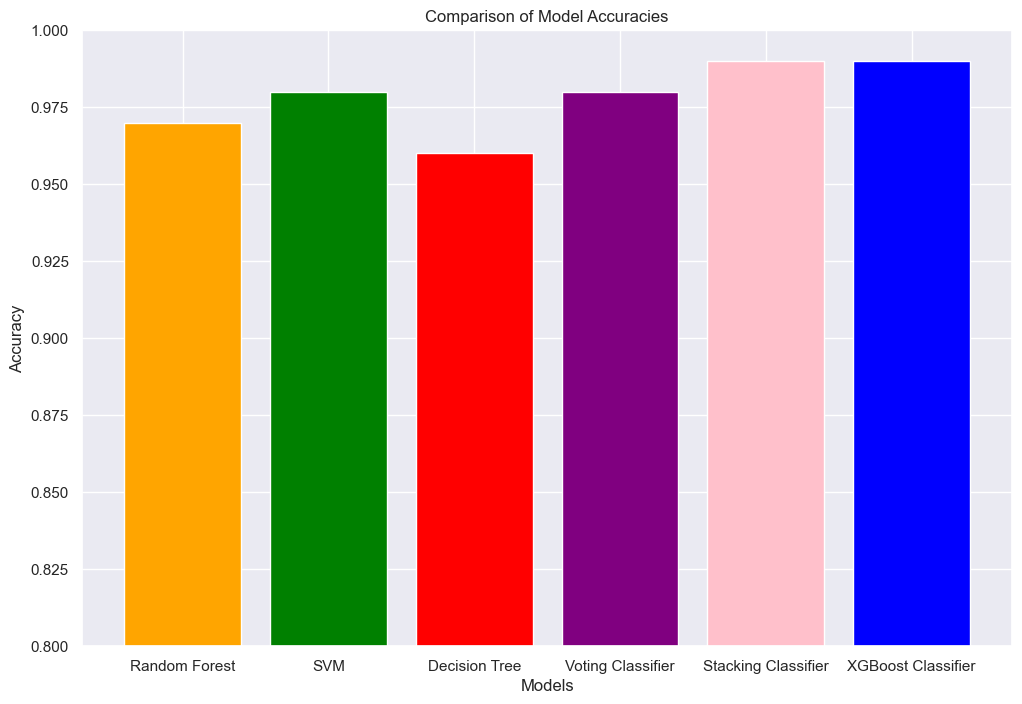

In [49]:
# Model comparison
model_results = {
    'Random Forest': 0.97,
    'SVM': 0.98,
    'Decision Tree': 0.96,
    'Voting Classifier': 0.98,
    'Stacking Classifier': 0.99,
    'XGBoost Classifier': 0.99
}


# Creating the comparison chart
plt.figure(figsize=(12, 8))
plt.bar(model_results.keys(), model_results.values(), color=['orange', 'green', 'red', 'purple', 'pink', 'blue'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  
plt.show()